In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 41
INFO:lsst.meas.deblender.proximal:Unblended sources: 25
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 16


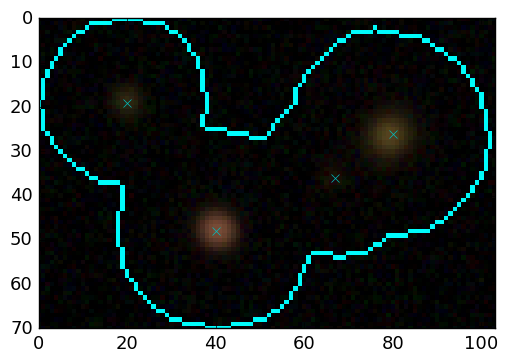

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
#display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
condition = expDb.mergedTable["peaks"]==4
#condition = (expDb.mergedTable["peaks"]>2) & (expDb.mergedTable["peaks"]<10)
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=condition, contrast=1)
deblend = proximal.DeblendedParent(expDb, footprint, peaks)

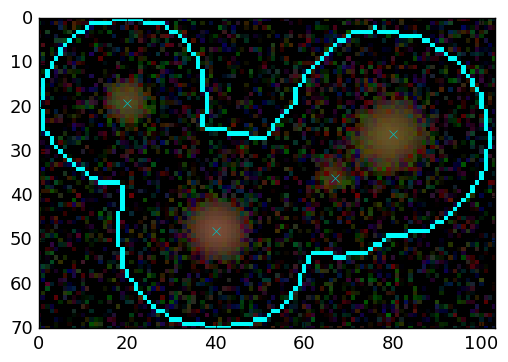

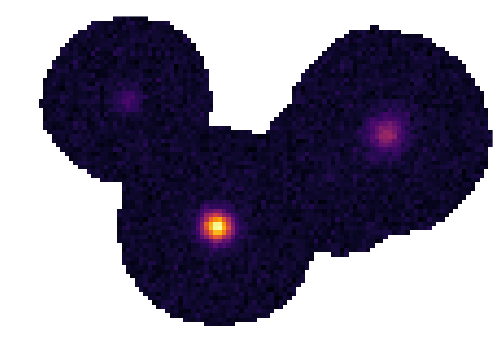

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:186 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.77109402027
INFO:lsst.meas.deblender.proximal:Residual difference 6.8%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 1.0623106629
INFO:lsst.meas.deblender.proximal:Residual difference 5.5%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.de

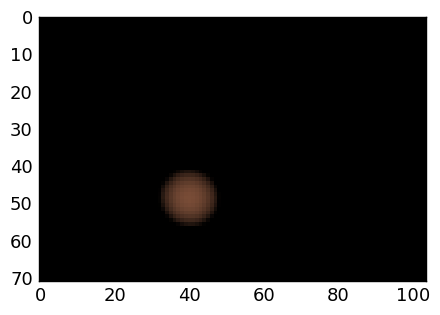

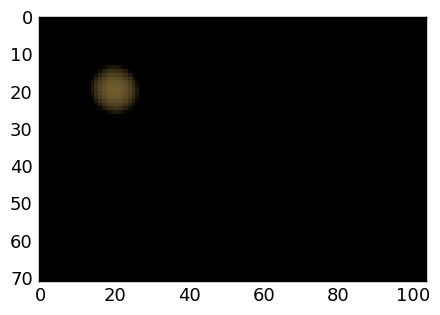

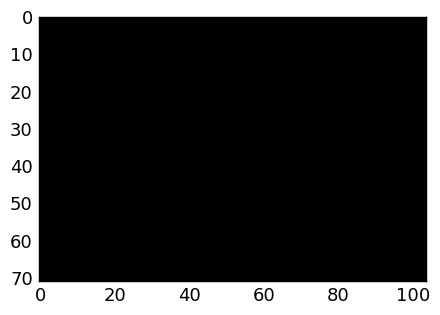

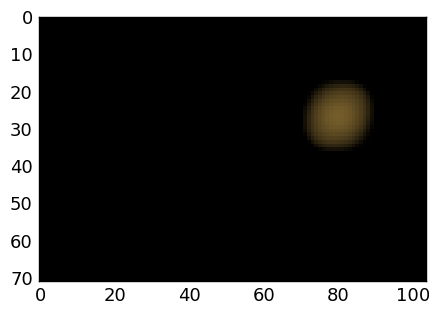

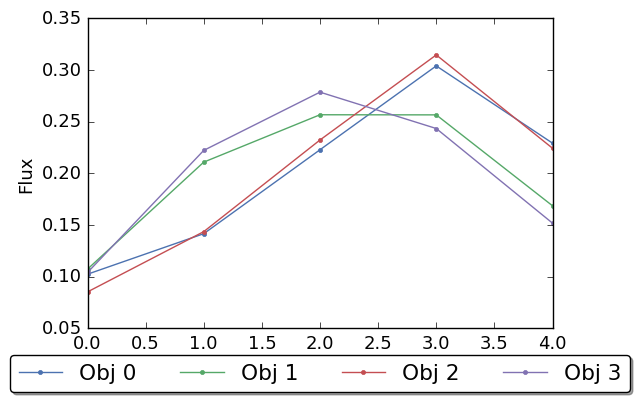

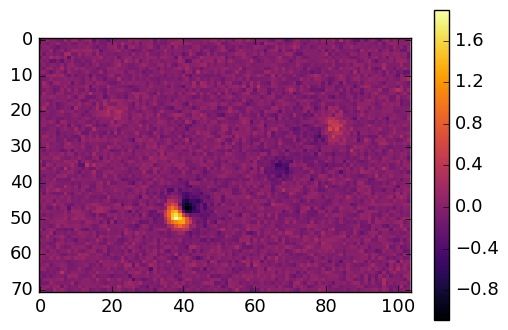

CPU times: user 18.5 s, sys: 1.92 s, total: 20.4 s
Wall time: 20.3 s


In [3]:
#%time glmm = expDb.deblendParent(condition=condition, display=True, maxiter=500, constraints='MS', nonSymmetricFill=0, algorithm="GLMM", usePsf=True, psfThresh=3e-3, l0_thresh=.005)

peakCoords = [
    (438.404759847,388.659118971),
    (418.055480683,359.586554206),
    (464.708379537,376.85311148),
    (477.316051723,367.343383131)
]
import lsst.meas.deblender.old_proximal_nmf as opnmf
%time glmm = expDb.deblendParent(condition=condition, display=True, maxiter=500, constraints='MS', usePsf=True, psfThresh=3e-3, l0_thresh=.005, e_rel=1e-3, algorithm="GLMM", pnmf=opnmf)#, peakCoords=peakCoords)

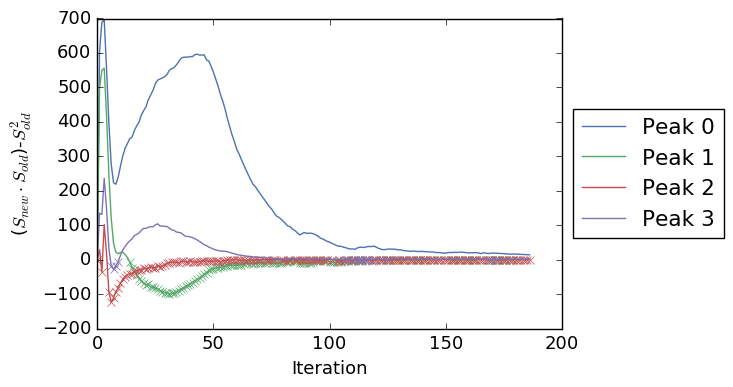

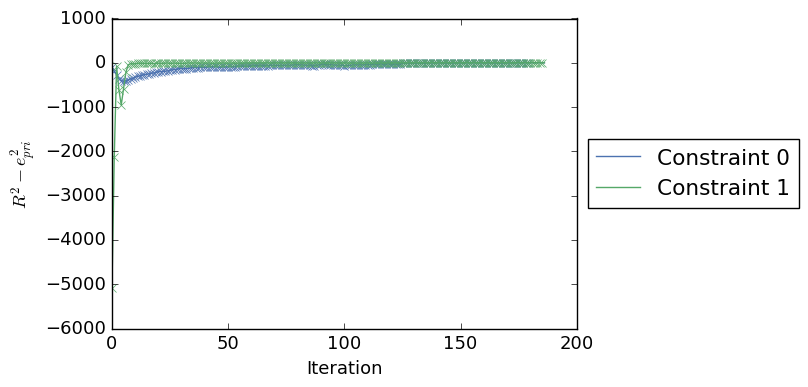

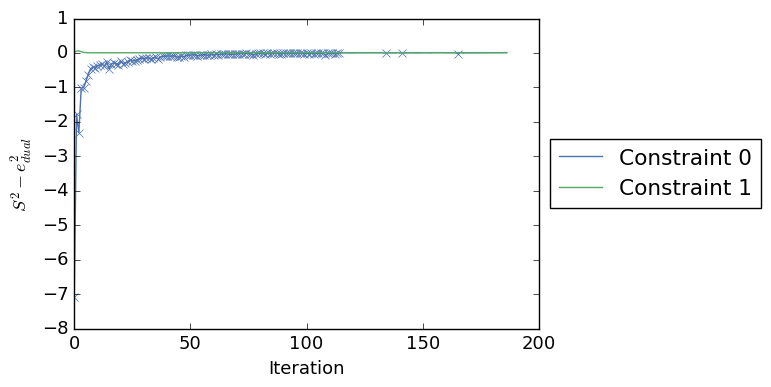

In [4]:
glmm.convergencePlots()

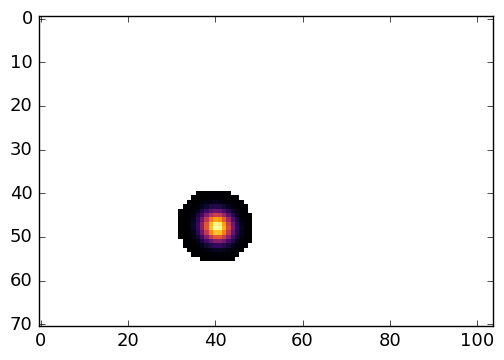

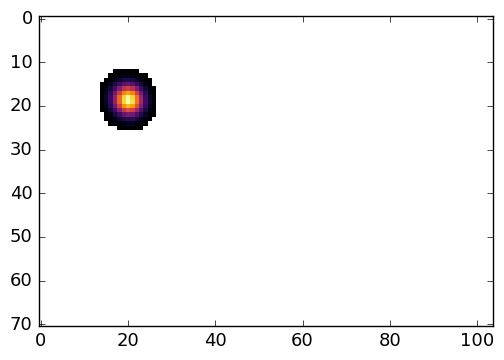

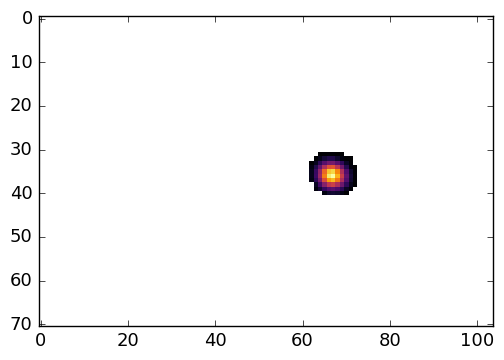

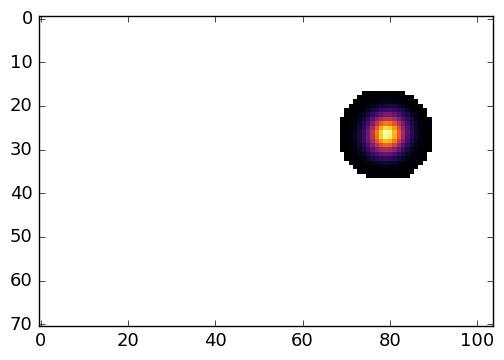

In [13]:
glmm.displayAllImages(0)

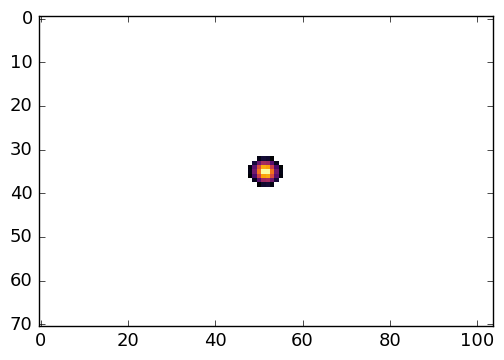

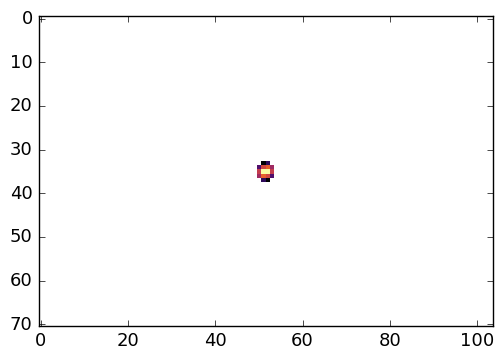

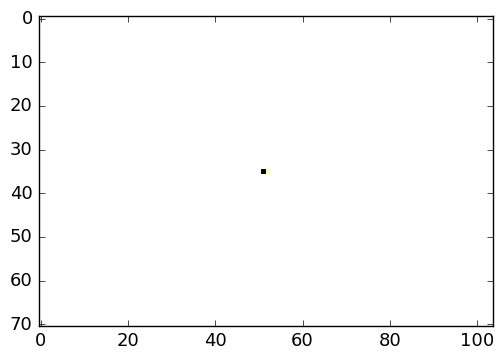

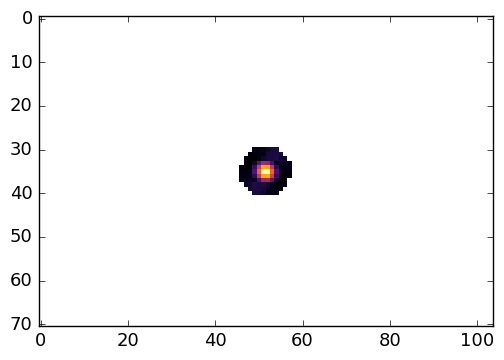

In [14]:
glmm.displayAllImages(imgType='intensity')

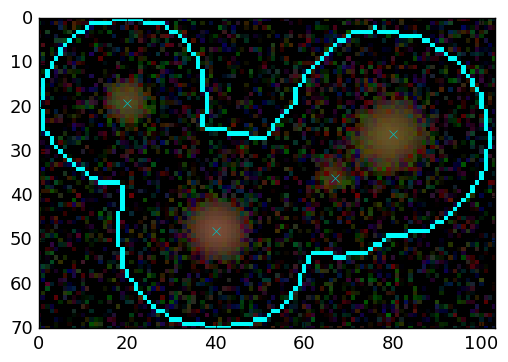

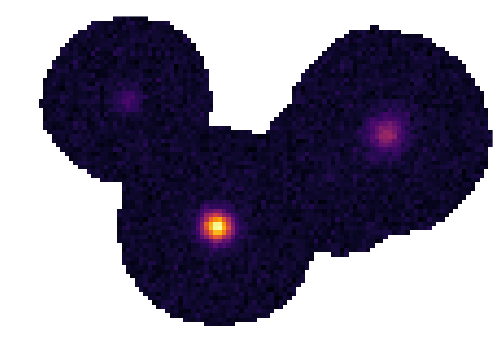

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Shape: (71, 104)
INFO:lsst.meas.deblender.proximal_nmf:Norm2: [  98.34777239  121.52366025]
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:499 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.397445887327
INFO:lsst.meas.deblender.proximal:Residual difference 0.1%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.447213292122
INFO:lsst.meas.deblender.proximal:Residual difference 4.5%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.377237945795
INFO:lsst.meas.deblender.proximal:R

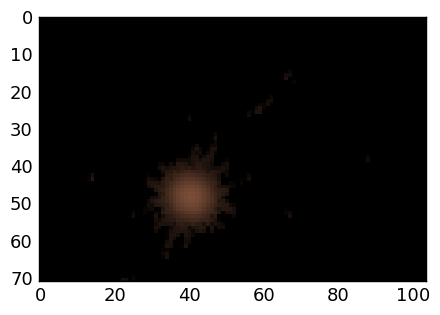

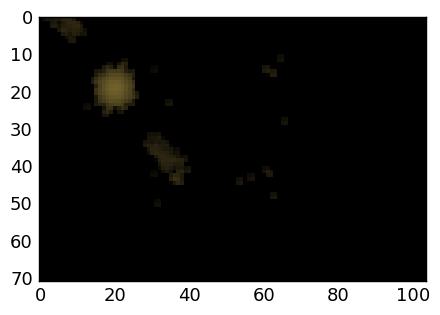

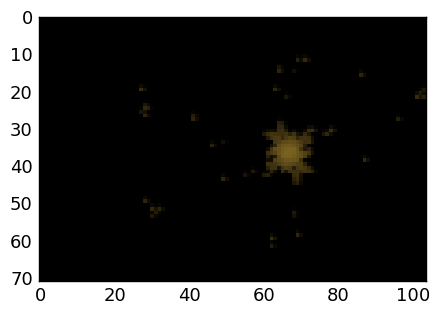

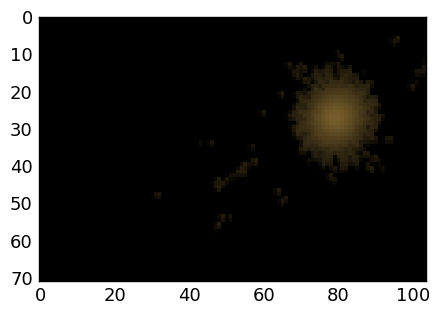

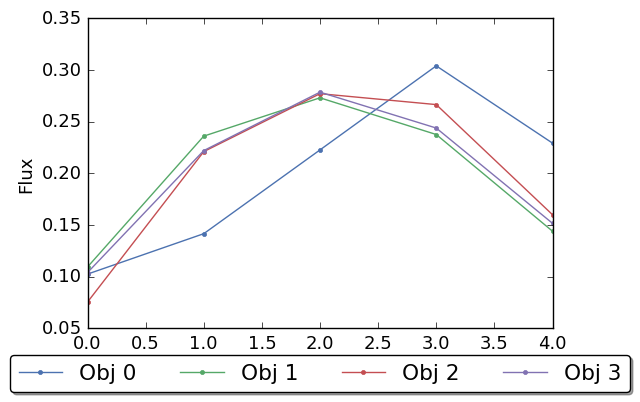

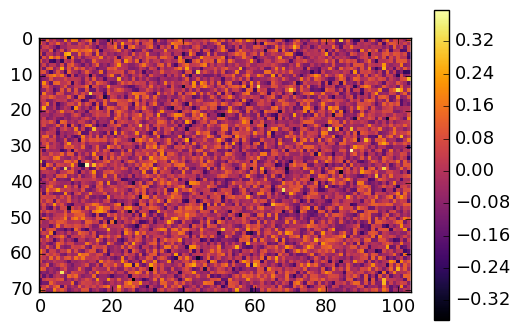

CPU times: user 12 s, sys: 235 ms, total: 12.2 s
Wall time: 12.2 s


In [4]:
peakCoords = [
    (438.404759847+.5,388.659118971),
    (418.055480683+.5,359.586554206),
    (464.708379537+.5,376.85311148),
    (477.316051723+.5,367.343383131)
]
%time glmm = expDb.deblendParent(condition=condition, display=True, maxiter=500, constraints='MS', usePsf=False, psfThresh=3e-3, l0_thresh=.0005, e_rel=1e-2, peakCoords=peakCoords)

INFO:lsst.meas.deblender.proximal:Total parents: 9
INFO:lsst.meas.deblender.proximal:Unblended sources: 4
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 5


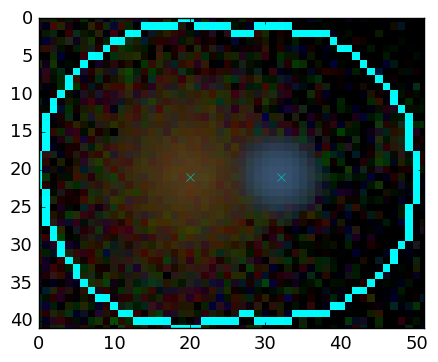

In [11]:
dataPath = '/Users/fred/lsst/deblender/sim_deblend'
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test1/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test1/det_merge.fits")
simFilename = os.path.join(dataPath, "test1/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
#display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
#condition = expDb.mergedTable["peaks"]==4
condition = (expDb.mergedTable["peaks"]>=2) & (expDb.mergedTable["peaks"]<=5)# & (expDb.mergedTable["peaks"]<10)
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=condition, contrast=1)
deblend = proximal.DeblendedParent(expDb, footprint, peaks)

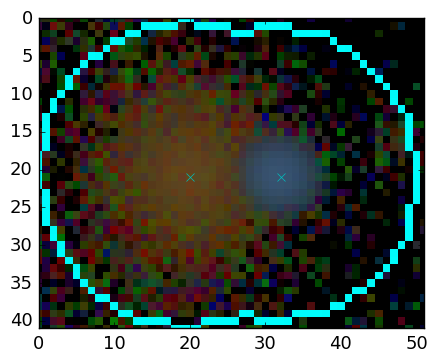

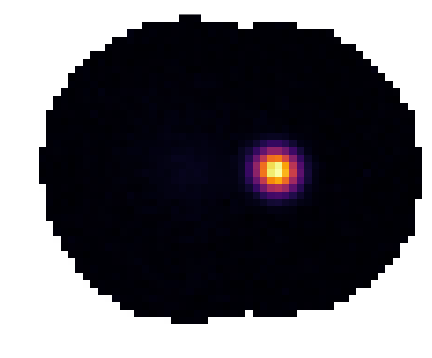

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:499 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -3.21871757507 to 138.013381958
INFO:lsst.meas.deblender.proximal:Max difference: 19.2705701484
INFO:lsst.meas.deblender.proximal:Residual difference 11.2%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -3.21871757507 to 138.013381958
INFO:lsst.meas.deblender.proximal:Max difference: 14.3474952526
INFO:lsst.meas.deblender.proximal:Residual difference 2.7%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.

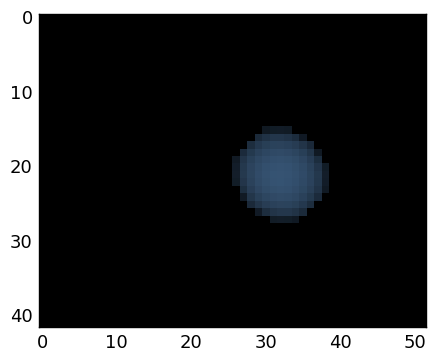

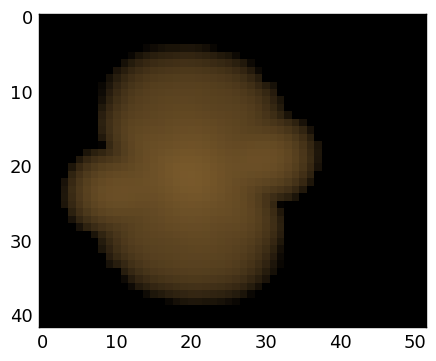

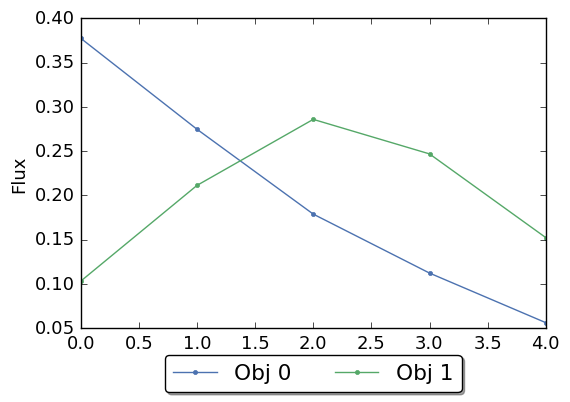

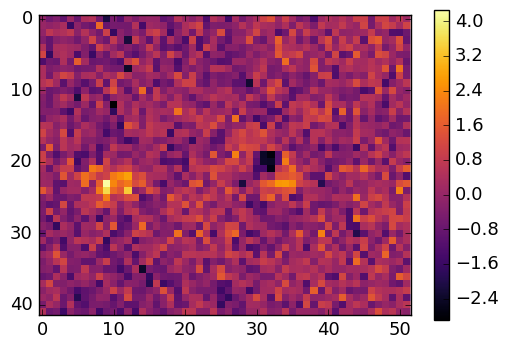

CPU times: user 11.6 s, sys: 263 ms, total: 11.8 s
Wall time: 11.8 s


In [18]:
%time glmm = expDb.deblendParent(condition=condition, parentIdx=0, display=True, maxiter=500, constraints='MS', usePsf=True, psfThresh=3e-3, l0_thresh=.5, e_rel=1e-2, algorithm="GLMM", monotonicUseNearest=True)#, peakCoords=peakCoords)

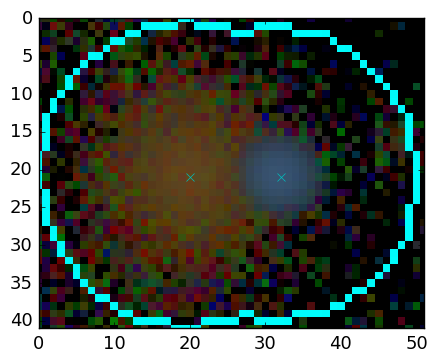

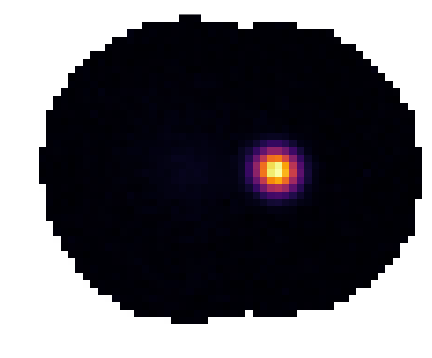

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Shape: (42, 52)
INFO:lsst.meas.deblender.proximal_nmf:Norm2: [ 53.53997181  66.09084657]
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:499 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -3.21871757507 to 138.013381958
INFO:lsst.meas.deblender.proximal:Max difference: 28.8597639718
INFO:lsst.meas.deblender.proximal:Residual difference 9.8%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -3.21871757507 to 138.013381958
INFO:lsst.meas.deblender.proximal:Max difference: 19.49

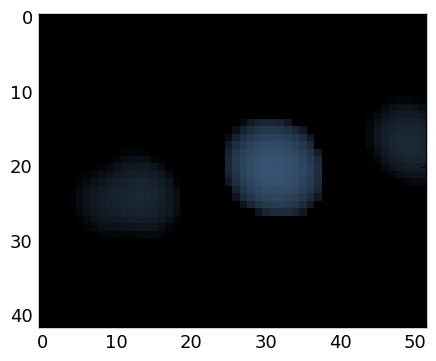

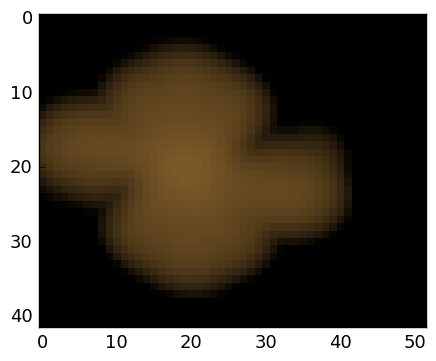

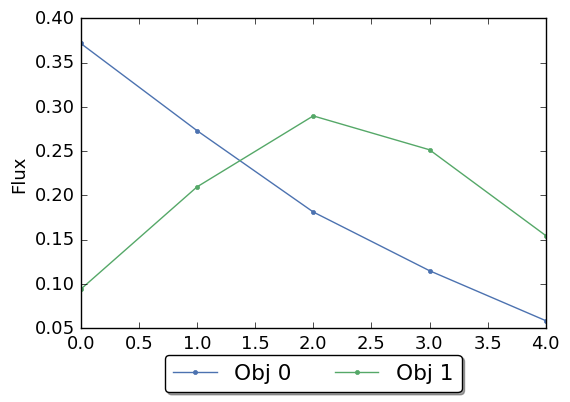

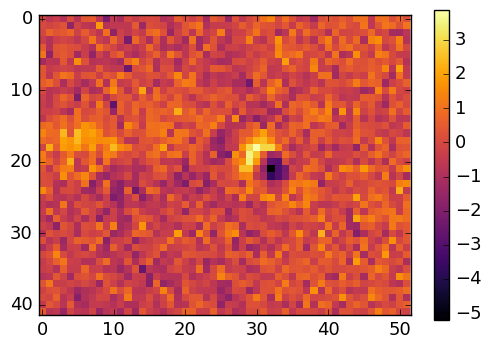

CPU times: user 10.4 s, sys: 162 ms, total: 10.6 s
Wall time: 10.6 s


In [15]:
peakCoords = [
    (146.739252207,60.6299536683),
    (134.981830307,60.6723839165)
]
%time glmm = expDb.deblendParent(condition=condition, parentIdx=0, display=True, maxiter=500, constraints='MS', usePsf=True, psfThresh=3e-3, l0_thresh=.5, e_rel=1e-2, peakCoords=peakCoords)

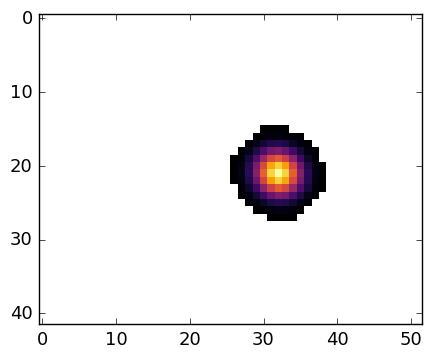

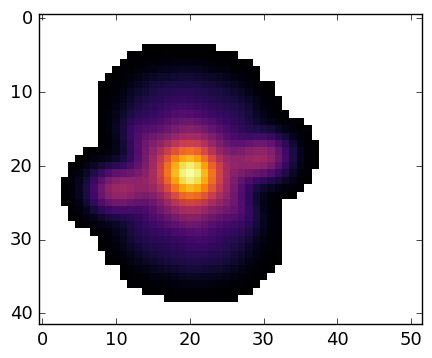

In [19]:
glmm.displayAllImages(0)

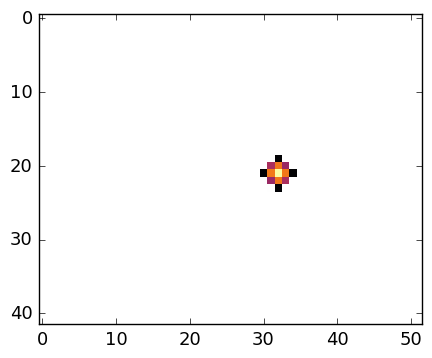

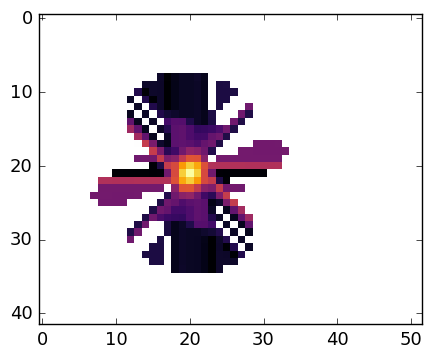

In [20]:
glmm.displayAllImages(imgType='intensity')

5.5631


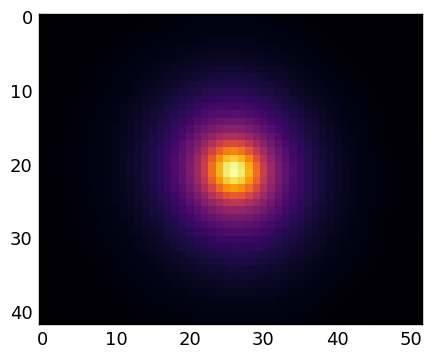

In [16]:
img = glmm.expDeblend.simTable[72]["intensity_g"]
w1 = int(np.sqrt(img.size))
img = img.reshape(w1,w1)

py, px = np.unravel_index(np.argmax(img), (w1,w1))
w = glmm.shape[1]>>1
h = glmm.shape[0]>>1

xmin = np.max([0, px-w])
xmax = np.min([w1, px+w])
ymin = np.max([0, py-h])
ymax = np.min([w1, py+h])

img = img[ymin:ymax, xmin:xmax]

print(np.max(img))

plt.imshow(img)

In [33]:
np.max(glmm.expDeblend.simTable[3]["intensity_g"])

139.60403